In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "data/ngc1245.csv"
#True color index = B - V - 0.96, where 0.96 is the reddening correction
df = pd.read_csv(file)
df.dropna(inplace=True)
df.head()

,Unnamed: 0,starNumber,B,V,B-V,V_corrected,B-V_corrected
2,2,3,11.673,10.964,0.709,10.004,0.409
4,4,5,12.705,11.768,0.937,10.808,0.637
5,5,6,13.204,12.029,1.175,11.069,0.875
6,6,7,12.707,12.440,0.267,11.480,-0.033
8,8,9,14.188,13.489,0.699,12.529,0.399


In [4]:
def classify_spectral_type(bv_value):
    if np.isnan(bv_value):
        return 'NaN'
    elif bv_value <= -0.2:
        return 'O'
    elif -0.2 <= bv_value < 0.2:
        return 'B'
    elif 0.2 <= bv_value < 0.5:
        return 'A'
    elif 0.5 <= bv_value < 0.7:
        return 'F'
    elif 0.7 <= bv_value < 1:
        return 'G'
    elif 1 <= bv_value < 1.6:
        return 'K'
    else:
        return 'M'

In [5]:
# Apply the classify_spectral_type function to df['B-V_corrected']
df['spectral_type'] = df['B-V_corrected'].apply(classify_spectral_type)
# Count the occurrences of each spectral type
spectral_type_counts = df['spectral_type'].value_counts()

custom_order = ['O', 'B', 'A', 'F', 'G', 'K']

# Reorder the index of spectral_type_counts using reindex
ordered_counts = spectral_type_counts.reindex(custom_order)


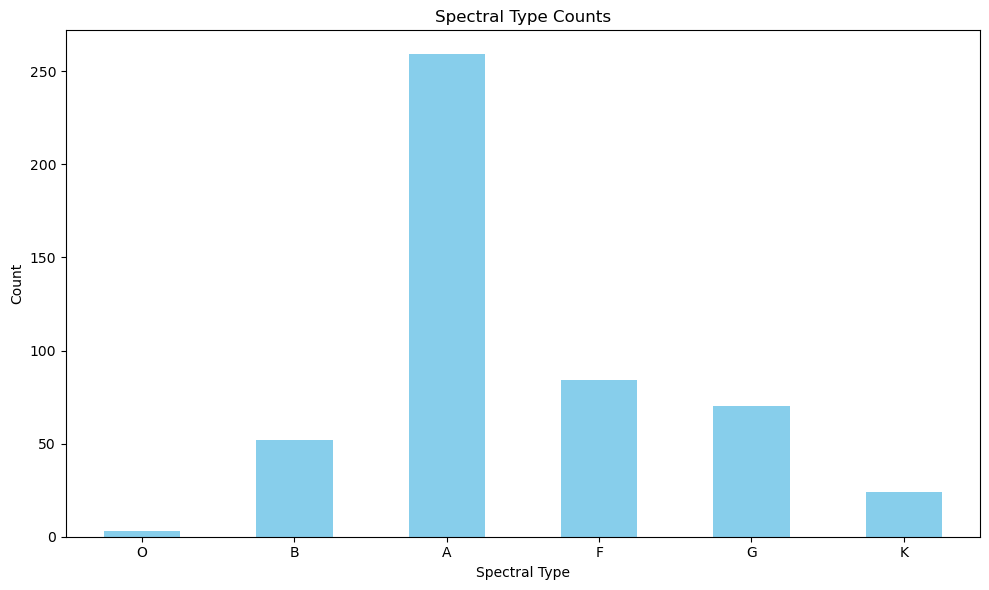

In [6]:
# Create a bar graph
plt.figure(figsize=(10, 6))
ordered_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Spectral Type')
plt.ylabel('Count')
plt.title('Spectral Type Counts')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('SpectralCounts.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [7]:
# Create a custom colormap mapping spectral types to colors
spectral_colors = {
    'O': 'cyan',
    'B': 'turquoise',
    'A': 'lightblue',
    'F': 'grey',
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}
#Seaborn palletee
custom_palette =  sns.xkcd_palette(spectral_colors.values())
df.dropna(inplace=True)

In [8]:
def get_color(spectral_type):
    return spectral_colors.get(spectral_type[0], 'black')  # Default to black if not found

# Use the get_color function to assign colors based on spectral type
colors = df['spectral_type'].apply(get_color)

C:\Users\mmann\AppData\Local\Temp\ipykernel_25408\525289153.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=tickmarks, label='Spectral Type')


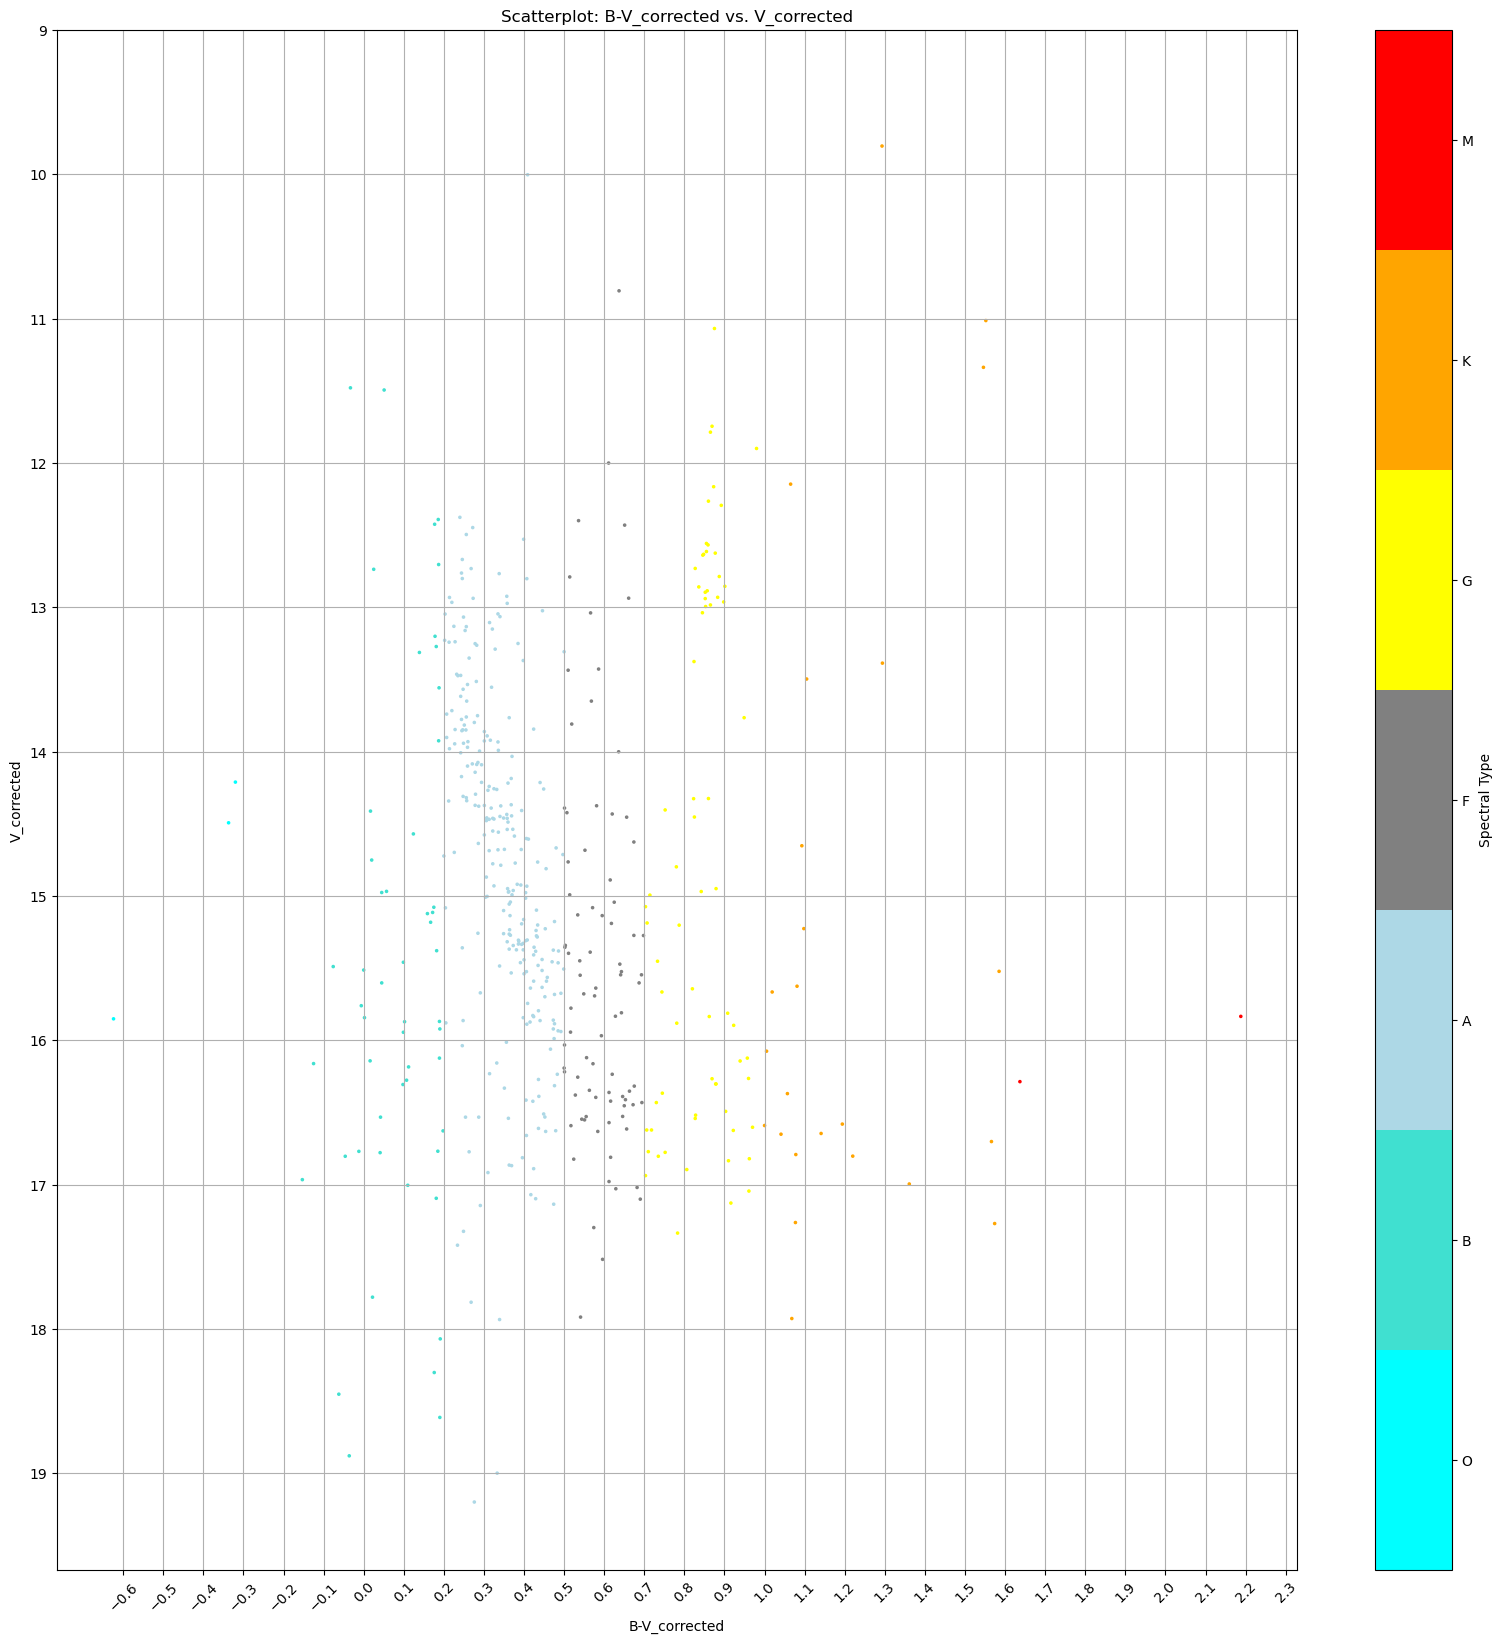

In [17]:
plt.figure(figsize=(20, 20))
plt.scatter(df['B-V_corrected'], df['V_corrected'], color=colors, marker='.', s=10)

plt.gca().invert_yaxis()

plt.xlabel('B-V_corrected')
plt.ylabel('V_corrected')
plt.title('Scatterplot: B-V_corrected vs. V_corrected')
plt.grid(True)


x_ticks = np.arange(-0.6, 2.4, 0.1)
y_ticks = np.arange(9, 19.5, 1)

plt.xticks(x_ticks, rotation=45)
plt.yticks(y_ticks)
import matplotlib.cm as cm
# Create a ScalarMappable for the custom color mapping
sm = cm.ScalarMappable(cmap=cm.colors.ListedColormap(list(spectral_colors.values())))
sm.set_array([])  # Set an empty array since we're not using actual numerical data

# Add the colorbar
tickmarks = (np.array([1,3,5,7,9,11, 13]))/14
cbar = plt.colorbar(sm, ticks=tickmarks, label='Spectral Type')
cbar.set_ticklabels(list(spectral_colors.keys()))  # Set tick labels to spectral types

plt.savefig('ColorMagWithTypeDiagram.pdf', format='pdf', bbox_inches='tight')
plt.show()